In [1]:
import os
import uproot
import numpy as np
import pandas as pd
from tqdm import tqdm
import tables

In [2]:
#DATA_DIR = '/storage/home/vprov/JUNO/JUNO_students/data/'
#TRAIN_DIR = '/srv/hd5/data/vprov/data/phase_1/train/'
TRAIN_DIR = '~/data/data_dir/'
tr_lpmt_hits = pd.read_hdf(TRAIN_DIR + 'lpmt_hits.h5', mode='r') 
tr_spmt_hits = pd.read_hdf(TRAIN_DIR + 'spmt_hits.h5', mode='r')
tr_pos = pd.read_csv(TRAIN_DIR + 'lpmt_pos.csv') 
tr_spmt_pos = pd.read_csv(TRAIN_DIR + 'spmt_pos.csv') 
tr_true_info = pd.read_csv(TRAIN_DIR + 'true_info.csv')

In [161]:
def get_integral_features(lpmt_hits, spmt_hits, pos, time=None):
    """
    Calculate and returns features: meanX, meanY, meanZ, R, meanTime, number of hits in event
    """
    merged_hits = pd.merge(lpmt_hits, pos, left_on='pmtID', right_on='pmt_id')
    
    means = merged_hits.groupby('event').mean()
    cohX = means['pmt_x']
    cohY = means['pmt_y']
    cohZ = means['pmt_z']
    
    if time == 'min':
        mins = merged_hits.groupby(['event', 'pmt_id']).min()['hitTime']
        cohT = mins.groupby('event').mean()
    else:
        cohT = means['hitTime']
    count = merged_hits.groupby('event')['hitTime'].count()
        
    approxR = np.sqrt(cohX**2 + cohY**2 + cohZ**2)
    
    return pd.DataFrame({'cohX':cohX.values, 
                         'cohY':cohY.values, 
                         'cohZ':cohZ.values, 
                         'cohT': cohT.values, 
                         'approxR': approxR.values,
                         'lpmtcount': count.values})

In [162]:
MAXR=17200

In [163]:
tr_lpmt_hits.shape

(929772250, 4)

In [103]:
rg = np.arange(0,100000,15000)

In [154]:
train_datasets = []

In [155]:
for start, end in tqdm(zip(rg[:-1], rg[1:])):
    train_data = get_integral_features(tr_lpmt_hits[(tr_lpmt_hits['event'] >= start) & (tr_lpmt_hits['event'] < end)
                                                                #& (tr_lpmt_hits['isDN'] == False)
                                                   ], 
                                       None,
                                       tr_pos,
                                        time='min')
    train_datasets.append(train_data)


0it [00:00, ?it/s]
1it [04:51, 291.11s/it]
2it [09:35, 289.16s/it]
3it [14:27, 289.98s/it]
4it [19:13, 288.67s/it]
5it [24:04, 289.50s/it]
6it [29:01, 291.80s/it]

In [157]:
5+5

10

In [106]:
part_merge = pd.merge(part_lpmt, tr_pos, left_on='pmtID', right_on='pmt_id')

In [107]:
part_merge[:5]

,event,hitTime,isDN,pmtID,pmt_id,pmt_x,pmt_y,pmt_z
0,0,249.992615,False,14175,14175,-5411.832,16838.455,-7471.1797
1,0,92.820419,False,14175,14175,-5411.832,16838.455,-7471.1797
2,5,225.598312,False,14175,14175,-5411.832,16838.455,-7471.1797
3,5,-99.477516,True,14175,14175,-5411.832,16838.455,-7471.1797
4,10,-33.376526,True,14175,14175,-5411.832,16838.455,-7471.1797


In [66]:
mins = part_merge.groupby(['event', 'pmt_id']).min()['hitTime']

In [99]:
mins.groupby('event').mean().values

array([138.52196, 143.8386 , 134.72455, 179.2931 , 147.21161, 134.94688,
       145.96176, 197.86484, 139.8496 , 142.34299, 146.62637, 167.8611 ,
       158.09668, 153.00868, 198.48198, 194.72925, 134.3426 , 162.01091,
       164.98238, 176.25958, 144.30318, 135.7364 , 149.58325, 145.39233,
       181.8219 , 195.29196, 134.18553, 172.49805, 154.62903, 143.91176,
       152.20406, 167.18681, 141.3697 , 135.57033, 206.48474, 132.87419,
       163.72026, 172.64345, 155.28963, 185.06169, 214.52695, 176.86008,
       135.21936, 180.7212 , 134.97643, 138.78455, 131.66533, 148.09859,
       162.57538, 135.45879, 135.43149, 136.58266, 134.54468, 154.88452,
       164.76248, 167.54005, 140.12907, 134.78424, 186.08376, 155.43806,
       146.31334, 179.8628 , 165.24908, 134.17804, 156.23671, 137.09329,
       130.39258, 150.81435, 137.47563, 138.35413, 152.39479, 202.6858 ,
       143.05858, 137.11688, 129.60605, 160.05786, 140.7835 , 153.1876 ,
       166.7922 , 136.00456, 140.26122, 136.52522, 

In [83]:
event_id = part_merge[['event', 'pmt_id']].values

In [86]:
mins[(event_id[0][0], event_id[0][1])]

92.82042

In [85]:
event_id[0]

array([    0, 14175])

In [158]:
train_data = pd.concat(train_datasets)

In [164]:
train_data.shape

(90000, 6)

In [165]:
import gc
gc.collect()

10198

In [166]:
train_data[:5]

,approxR,cohT,cohX,cohY,cohZ,lpmtcount
0,11087.730090,138.521957,6196.796140,9166.292631,718.717986,8902
1,10315.811413,143.838593,8180.098156,3728.797627,-5059.449329,7305
2,11231.662217,134.724548,10795.610080,-3092.824944,198.678193,12060
3,10689.548785,179.293106,-1361.385157,-10367.805058,2218.490919,6718
4,9407.823529,147.211609,-6298.465115,547.762159,6966.809698,5966


In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
scaler = StandardScaler()

In [169]:
normalized_train = scaler.fit_transform(train_data)

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [170]:
#train_data['lpmtcount'] = train_data['lpmtcount'] / 20000
#train_data['cohT'] = train_data['cohT'] / 200
#train_data['cohX'] = train_data['cohX'] / 10000
#train_data['cohY'] = train_data['cohY'] / 10000
#train_data['cohZ'] = train_data['cohZ'] / 10000
#train_data['approxR'] = train_data['approxR'] / 10000

In [171]:
N = normalized_train.shape[0]

In [172]:
Y = tr_true_info[:N]

In [173]:
mask = Y.R < MAXR

In [174]:
import keras
import keras.layers as L
from keras.models import Sequential
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1',
 '/job:localhost/replica:0/task:0/device:GPU:2',
 '/job:localhost/replica:0/task:0/device:GPU:3']

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(normalized_train[mask], Y[mask]['E'].values, 
                                                    test_size=0.1, random_state=42)

In [177]:
X_train.shape

(74375, 6)

In [178]:
model = Sequential()
model.add(L.Dense(100, activation='relu', kernel_initializer=keras.initializers.glorot_normal()))
#model.add(L.BatchNormalization())
model.add(L.Dense(100, activation='relu', kernel_initializer=keras.initializers.glorot_normal()))
#model.add(L.BatchNormalization())
#model.add(L.Dropout(rate=0.5))
model.add(L.Dense(100, activation='relu', kernel_initializer=keras.initializers.glorot_normal()))
#model.add(L.Dropout(rate=0.5))
model.add(L.Dense(100, activation='relu', kernel_initializer=keras.initializers.glorot_normal()))
#model.add(L.BatchNormalization())
#model.add(L.Dropout(rate=0.5))
model.add(L.Dense(100, activation='relu', kernel_initializer=keras.initializers.glorot_normal()))
model.add(L.Dense(50, kernel_initializer=keras.initializers.glorot_normal()))
model.add(L.Dense(1))

In [179]:
from keras.optimizers import Adam
opt = Adam(decay=1e-5)
from keras.optimizers import Adagrad
from keras.optimizers import SGD
#opt = SGD(momentum=0.9, nesterov=0.95)

In [180]:
model.compile(loss='mean_squared_error', optimizer=opt)

In [181]:
model.build(input_shape=(None, 6))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 51        
Total para

In [182]:
logdir = 'logs_3.csv'
#!rm logs_3.csv

In [183]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger(logdir, append=True, separator=';')

In [184]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.000001)

In [185]:
out = model.fit(X_train, y_train, batch_size=32, 
                epochs=50,
                callbacks=[csv_logger, reduce_lr],
                validation_data=(X_test, y_test),
                shuffle=True)

Train on 74375 samples, validate on 8264 samples
Epoch 1/50
74375/74375 [==============================] - 11s 143us/step - loss: 0.2069 - val_loss: 0.0179
Epoch 2/50
74375/74375 [==============================] - 10s 135us/step - loss: 0.0237 - val_loss: 0.0170
Epoch 3/50
74375/74375 [==============================] - 10s 133us/step - loss: 0.0209 - val_loss: 0.0225
Epoch 4/50
74375/74375 [==============================] - 10s 134us/step - loss: 0.0208 - val_loss: 0.0126
Epoch 5/50
74375/74375 [==============================] - 10s 134us/step - loss: 0.0185 - val_loss: 0.0150
Epoch 6/50
74375/74375 [==============================] - 10s 134us/step - loss: 0.0178 - val_loss: 0.0139
Epoch 7/50
74375/74375 [==============================] - 10s 135us/step - loss: 0.0126 - val_loss: 0.0108
Epoch 8/50
74375/74375 [==============================] - 10s 134us/step - loss: 0.0125 - val_loss: 0.0109
Epoch 9/50
74375/74375 [==============================] - 10s 132us/step - loss: 0.0125 - val_l

KeyboardInterrupt: 

In [198]:
from sklearn.metrics.pairwise import paired_euclidean_distances
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
preds = model.predict(X_test)

In [188]:
preds.reshape((-1)).shape

(8264,)

In [189]:
test_resultsE = mean_squared_error(preds, y_test)

In [190]:
df = pd.DataFrame({"y_test":y_test.reshape((-1)), "prop": (preds.reshape((-1))/y_test)})

/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


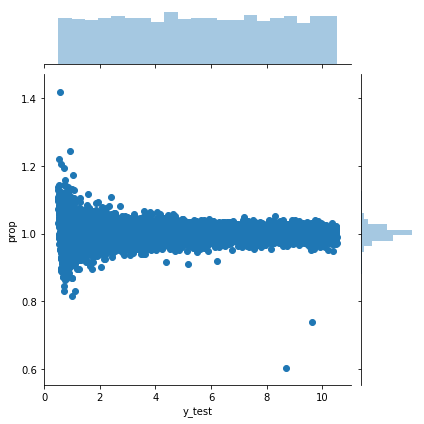

In [191]:
sns.jointplot(x="y_test", y="prop", data=df)

In [199]:
CONST = 1.022

In [200]:
sigmas = {}
MSEs = {}
predictions = {}

In [205]:
from sklearn.metrics.pairwise import paired_euclidean_distances
from sklearn.metrics import mean_squared_error

def test_sigmas(model, test_dir='/mnt/iprovilkov/data_dir/', test_column='E', MAXR=MAXR, scaler=scaler):
    sigmas = {}
    MSEs = {}
    predictions = {}
    CONST = 1.022
    for energy in tqdm(range(10)):
        lpmt_hits = pd.read_hdf(test_dir + str(energy)+'MeV_'+ 'lpmt_hits.h5', mode='r') 
        spmt_hits = pd.read_hdf(test_dir + str(energy)+'MeV_'+'spmt_hits.h5', mode='r')
        lpmt_hits = lpmt_hits[lpmt_hits.isDN==False]
        spmt_hits = spmt_hits[spmt_hits.isDN==False]
        pos = pd.read_csv(TRAIN_DIR + str(energy)+'MeV_'+'lpmt_pos.csv') 
        spmt_pos = pd.read_csv(TRAIN_DIR + str(energy)+'MeV_'+'spmt_pos.csv') 
        true_info = pd.read_csv(TRAIN_DIR + str(energy)+'MeV_'+'true_info.csv')
        
        data_lpmt = get_integral_features(lpmt_hits, None, pos, time='min')
        
        data_lpmt = scaler.transform(data_lpmt)
        
        mask = (true_info.R<=MAXR)
        data_lpmt = data_lpmt[mask]
        true_info = true_info[mask]
        preds = np.maximum(model.predict(data_lpmt), 0)
        y_test = true_info[test_column]
        print(y_test.mean())
        predictions[energy] = preds
        MSEs[energy] = mean_squared_error(preds, y_test)
        # in percents
        sigmas[energy] = np.std(preds - y_test.mean()) / (energy + CONST)
    return sigmas, MSEs, predictions

In [206]:
sigmas, MSEs, predictions = test_sigmas(model)


  0%|          | 0/10 [00:00<?, ?it/s]/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.

 10%|█         | 1/10 [00:07<01:08,  7.59s/it]

0.5109988999999999


/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.

 20%|██        | 2/10 [00:23<01:20, 10.04s/it]

1.5109988697622994


/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.

 30%|███       | 3/10 [00:42<01:29, 12.78s/it]

2.5109990065502177


/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.

 40%|████      | 4/10 [01:07<01:38, 16.39s/it]

3.5109988987951803


/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.

 50%|█████     | 5/10 [01:38<01:43, 20.76s/it]

4.510998806956522


/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.

 60%|██████    | 6/10 [02:11<01:37, 24.46s/it]

5.510998686870312


/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.

 70%|███████   | 7/10 [02:49<01:25, 28.41s/it]

6.510998666593649


/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.

 80%|████████  | 8/10 [03:29<01:04, 32.12s/it]

7.510998798899285


/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.

 90%|█████████ | 9/10 [04:17<00:36, 36.84s/it]

8.510999212171052


/home/iprovilkov/data/p3.5/lib/python3.5/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.

100%|██████████| 10/10 [05:12<00:00, 42.14s/it]

9.510998837121212


In [207]:
sigmas, MSEs

({0: 0.17684763716624907,
  1: 0.11006971907780737,
  2: 0.0809886345478338,
  3: 0.06730057954906765,
  4: 0.059110597992551035,
  5: 0.04939321701964521,
  6: 0.04167879826321082,
  7: 0.03695969449644581,
  8: 0.03237533770176239,
  9: 0.032397568808703855},
 {0: 0.6701280544529845,
  1: 0.18943541605197592,
  2: 0.061610224167931646,
  3: 0.12112586015298735,
  4: 0.23383225653755682,
  5: 0.31653040446781455,
  6: 0.38045198350129367,
  7: 0.4533463787128109,
  8: 0.45675420182729776,
  9: 0.5258968042422346})

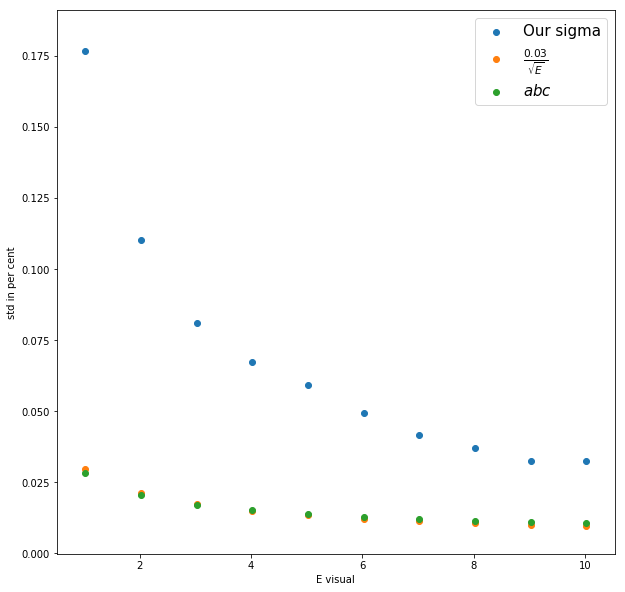

In [208]:
a = 2.8
b=0.59
c=0

# Plot sigmas
Evis = np.array([en + 1.022  for en in range(10)])
Perc_sigmas = [sigmas[en] for en in range(10)]
perc_3_sqrt_E = [0.03 / np.sqrt(en) for en in Evis]
fig = plt.figure(figsize=(10,10))
plt.scatter(Evis, Perc_sigmas, label='Our sigma')
plt.scatter(Evis, perc_3_sqrt_E, label=r'$\frac{0.03}{\sqrt{E}}$')
plt.scatter(Evis, 0.01*np.sqrt((a/np.sqrt(Evis))**2 + b**2 + (c/Evis)**2), label=r'$abc$')
plt.ylabel("std in per cent")
plt.xlabel("E visual")
plt.legend(fontsize=15)

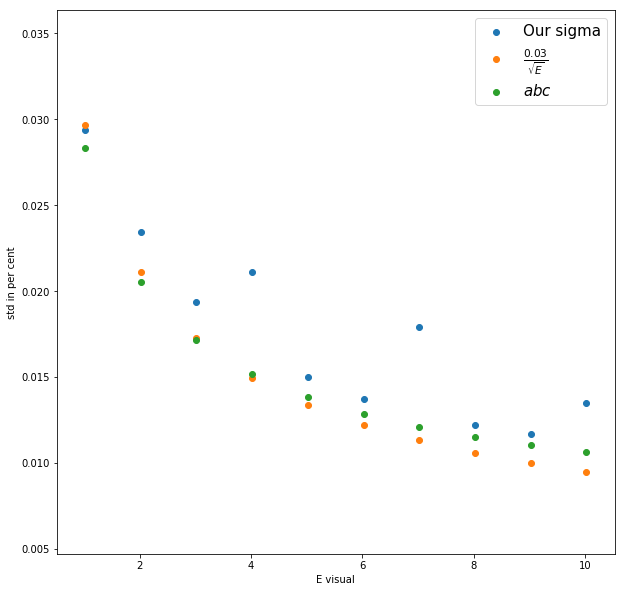

In [148]:
a = 2.8
b=0.59
c=0

# Plot sigmas
Evis = np.array([en + 1.022  for en in range(10)])
Perc_sigmas = [sigmas[en] for en in range(10)]
perc_3_sqrt_E = [0.03 / np.sqrt(en) for en in Evis]
fig = plt.figure(figsize=(10,10))
plt.scatter(Evis, Perc_sigmas, label='Our sigma')
plt.scatter(Evis, perc_3_sqrt_E, label=r'$\frac{0.03}{\sqrt{E}}$')
plt.scatter(Evis, 0.01*np.sqrt((a/np.sqrt(Evis))**2 + b**2 + (c/Evis)**2), label=r'$abc$')
plt.ylabel("std in per cent")
plt.xlabel("E visual")
plt.legend(fontsize=15)